### Revenue Based On ImDB Set

In [4]:
import pandas as pd
oscars = pd.read_csv('OscarsDatasets.csv')
movies = pd.read_csv('imdb_1972-2019.csv')
oscars.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  object
 7   winner_binary  10889 non-null  int64 
 8   win            10889 non-null  bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 691.3+ KB


In [5]:
import numpy as np
oscars['win_']= np.where(oscars['win']=='TRUE',1,0) 
oscars['decade_award'] = (10 * (oscars['year_ceremony'] // 10)).astype(str) + 's' 
oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,winner_binary,win,win_,decade_award
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,NOMINATED,0,False,0,1920s
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,WINNER,1,True,0,1920s
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,NOMINATED,0,False,0,1920s
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,WINNER,1,True,0,1920s
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,NOMINATED,0,False,0,1920s


In [6]:
melted_oscars = pd.pivot_table(oscars,values='win_',index=['year_film','film','decade_award'],
                               columns='category').reset_index()
melted_oscars.replace(1,2,inplace=True)
melted_oscars.replace(0,1,inplace=True)
melted_oscars.fillna(0,inplace=True)
melted_oscars

category,year_film,film,decade_award,ACTOR,ACTOR IN A LEADING ROLE,ACTOR IN A SUPPORTING ROLE,ACTRESS,ACTRESS IN A LEADING ROLE,ACTRESS IN A SUPPORTING ROLE,ANIMATED FEATURE FILM,...,WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced),WRITING (Screenplay),WRITING (Screenplay--Adapted),WRITING (Screenplay--Original),WRITING (Screenplay--based on material from another medium),WRITING (Story and Screenplay),WRITING (Story and Screenplay--based on factual material or material not previously published or produced),WRITING (Story and Screenplay--based on material not previously published or produced),WRITING (Story and Screenplay--written directly for the screen),WRITING (Title Writing)
0,1927,7th Heaven,1920s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1927,A Ship Comes In,1920s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1927,Chang,1920s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1927,Glorious Betsy,1920s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1927,Sadie Thompson,1920s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,2023,The Teachers' Lounge,2020s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5147,2023,The Wonderful Story of Henry Sugar,2020s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5148,2023,The Zone of Interest,2020s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5149,2023,To Kill a Tiger,2020s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
movies.head()

,Unnamed: 0,Title,Year,Rating,Metascore,Votes,Description,Genre,Runtime (Minutes),Revenue (Millions),Actors,Director
0,0,Avengers: Endgame,2019,8.5,78.0,648248,After the devastating events of Avengers: ...,"Action, Adventure, Drama",181,858.37,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Anthony Russo, Joe Russo"
1,1,Spider-Man: Far from Home,2019,7.6,69.0,255849,Following the events of Avengers: Endgame ...,"Action, Adventure, Sci-Fi",129,388.53,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Jon Watts
2,2,Toy Story 4,2019,7.9,84.0,146740,"When a new toy called ""Forky"" joins Woody ...","Animation, Adventure, Comedy",100,433.03,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",Josh Cooley
3,3,Jumanji: The Next Level,2019,7.0,58.0,63856,"In Jumanji: The Next Level, the gang is ba...","Action, Adventure, Comedy",123,0.00,"Dwayne Johnson, Jack Black, Kevin Hart, Karen ...",Jake Kasdan
4,4,The Lighthouse,2019,7.8,83.0,50595,Two lighthouse keepers try to maintain the...,"Drama, Fantasy, Horror",109,0.43,"Robert Pattinson, Willem Dafoe, Valeriia Karaman",Robert Eggers


In [8]:
df = pd.merge(movies,melted_oscars,left_on=['Title','Year'],right_on=['film','year_film'])
df.head()

,Unnamed: 0,Title,Year,Rating,Metascore,Votes,Description,Genre,Runtime (Minutes),Revenue (Millions),...,WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced),WRITING (Screenplay),WRITING (Screenplay--Adapted),WRITING (Screenplay--Original),WRITING (Screenplay--based on material from another medium),WRITING (Story and Screenplay),WRITING (Story and Screenplay--based on factual material or material not previously published or produced),WRITING (Story and Screenplay--based on material not previously published or produced),WRITING (Story and Screenplay--written directly for the screen),WRITING (Title Writing)
0,0,Avengers: Endgame,2019,8.5,78.0,648248,After the devastating events of Avengers: ...,"Action, Adventure, Drama",181,858.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Toy Story 4,2019,7.9,84.0,146740,"When a new toy called ""Forky"" joins Woody ...","Animation, Adventure, Comedy",100,433.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,The Lighthouse,2019,7.8,83.0,50595,Two lighthouse keepers try to maintain the...,"Drama, Fantasy, Horror",109,0.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,Joker,2019,8.6,59.0,616184,"In Gotham City, mentally troubled comedian...","Crime, Drama, Thriller",122,192.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,Ford v Ferrari,2019,8.3,81.0,91867,American car designer Carroll Shelby and d...,"Action, Biography, Drama",152,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df['oscar_buzz'].corr(df['Revenue (Millions)'])

0.20019392557350624

In [8]:
df['Runtime (Minutes)'].corr(df['Revenue (Millions)'])

0.05960550105122781

In [9]:
df['oscar_buzz'].corr(df['Runtime (Minutes)'])

0.3449734581164495

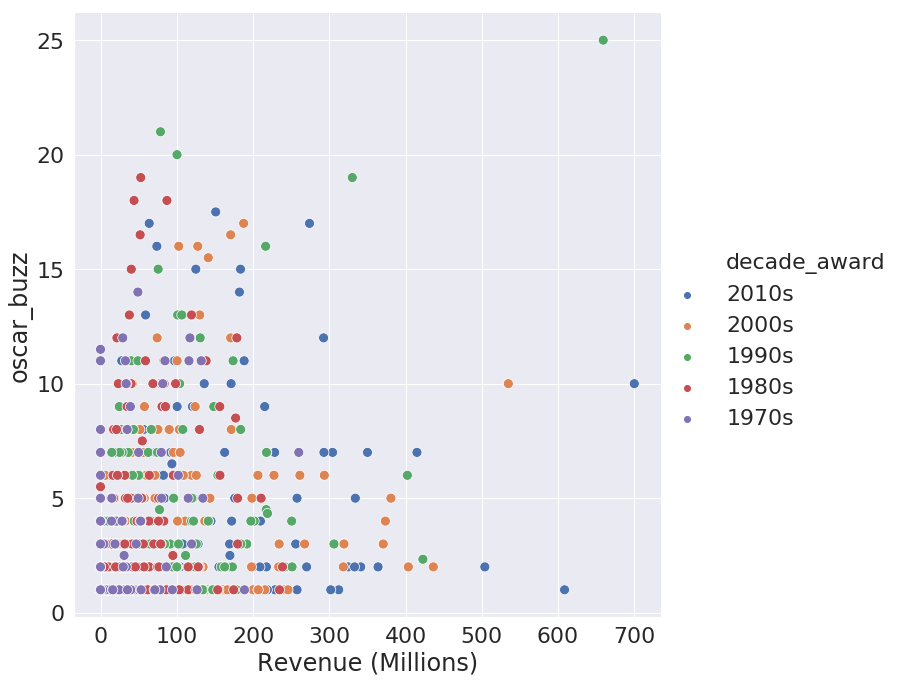

In [10]:
import seaborn as sns
sns.set(font_scale=2)
plot = sns.relplot(x='Revenue (Millions)', y='oscar_buzz',hue='decade_award',kind='scatter',data=df, height=10,
           s=100, label='large')
plot.savefig("OscarsOutliers.png")

Outliers are listed below based on where they fall on the scatterplot above. 

In [11]:
df['Title'][(df['decade_award']=='1990s')&(df['Revenue (Millions)']>600)]

444    Titanic
Name: Title, dtype: object

In [12]:
df['Title'][(df['decade_award']=='2010s')&(df['Revenue (Millions)']>700)]

0    Black Panther
Name: Title, dtype: object

In [13]:
df['Title'][(df['decade_award']=='2000s')&(df['Revenue (Millions)']>500)]

206    The Dark Knight
Name: Title, dtype: object

In [14]:
df['Title'][(df['decade_award']=='1990s')&(df['Revenue (Millions)']<100)&(df['oscar_buzz']>20)]

462    The English Patient
Name: Title, dtype: object

In [15]:
df['Title'][(df['decade_award']=='1990s')&(df['Revenue (Millions)']>90)&(df['oscar_buzz']==20)]

414    Shakespeare in Love
Name: Title, dtype: object

In [16]:
df['Title'][(df['decade_award']=='2010s')&(df['Revenue (Millions)']>600)&(df['oscar_buzz']<2)]

2    Incredibles 2
Name: Title, dtype: object